In order to take advantage of genetic algorithms to solve our problem we need the correct modeling from the problem we're occuring and the concepts of genetic algorithm

The genetc algorithm tries a methodology on a population in order to convergent the population to a maximized parameter .

From What I have understanded the indicator that shows how close the data is to the maximized parameter is called the fitnes function
On each iteration of generation we calculate the top percentage of the population and survive them to the next generation(indicated in code by survivor rate) and the other percentage of the next generaition will be created by the merge of crossover function and mutation function which the crossover mixes two chromosome and the mutation intention is to create the diversity out of our previuos generation chromosomes' domain

now we need to model the told functions to our own domain of example

The Fitness function: We want a curve to be as close as possible to few points so we can simply calculate the sum of differences at the points we have data but the problem was that in this definition the less the fitness value was the better our data set were.
ps:after a few tries  Fatame Baharvand explained to me how the squared sum of differences could be a better fitness function I also added a fitness value function which returns the 1/1+error as the fitness value just to have an incrementing value for fitness

The crossover function choose a number between 1 and len of chromosomes and break the previuos chromosomes from the choosen point and

Enter the degree of the polynomial: 3
Enter the coefficient limits for coefficient 0 in the format 'lower_limit,upper_limit': -10,10
Enter the coefficient limits for coefficient 1 in the format 'lower_limit,upper_limit': -10,10
Enter the coefficient limits for coefficient 2 in the format 'lower_limit,upper_limit': -10,10
Enter the coefficient limits for coefficient 3 in the format 'lower_limit,upper_limit': -10,10
Original Polynomial:
y = -4.534105916178943x^0 + -3.2446017285916025x^1 + -0.10611482572072894x^2 + 3.823523726596207x^3
Generation 0, Best Fitness: 132.8263694642703, Best Coefficients: [ 9.62412249  5.23748334 -4.00635577  4.16934953]
Generation 1, Best Fitness: 10.589180711105898, Best Coefficients: [-4.22277867 -3.08014698 -0.36662179  3.8604286 ]
Generation 2, Best Fitness: 10.589180711105898, Best Coefficients: [-4.22277867 -3.08014698 -0.36662179  3.8604286 ]
Generation 3, Best Fitness: 10.589180711105898, Best Coefficients: [-4.22277867 -3.08014698 -0.36662179  3.8604

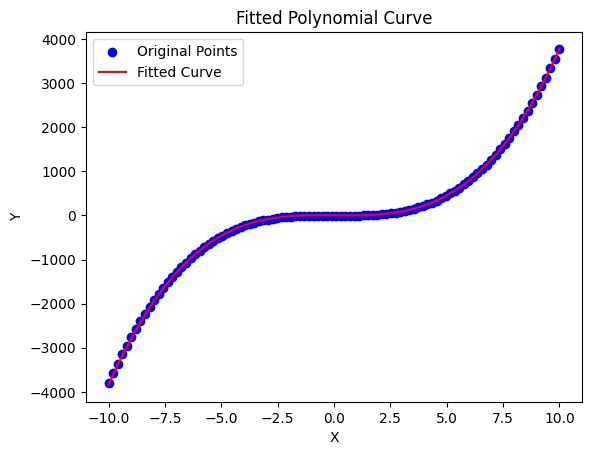

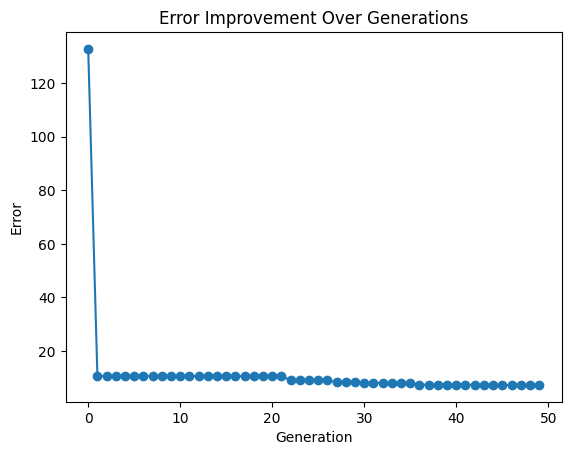

In [ ]:
#CODE VERSION 1
import numpy as np
import matplotlib.pyplot as plt

# Fitness function to evaluate the goodness of fit
def generate_polynomial_points(coefficients, num_points):
    x_values = np.linspace(-10, 10, num_points)
    y_values = np.polynomial.polynomial.polyval(x_values, coefficients)
    return np.column_stack((x_values, y_values))

def fitness_function(original, fitted):
    return np.mean(np.abs(original - fitted))

# Crossover operation for the genetic algorithm
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Mutation operation for the genetic algorithm
def mutate(child, mutation_rate, coef_limits):
    for i in range(len(child)):
        if np.random.rand() < mutation_rate:
            child[i] = np.random.uniform(coef_limits[i][0], coef_limits[i][1])
    return child

# Genetic Algorithm
def genetic_algorithm(degree, coef_limits, original_points, population_size, mutation_rate, generations):
    population = []
    for _ in range(population_size):
        individual = []
        for limits in coef_limits:
            individual.append(np.random.uniform(limits[0], limits[1]))
        population.append(np.array(individual))

    errors_over_generations = []  # List to store errors for each generation

    for gen in range(generations):
        fitness_scores = []
        for individual in population:
            fitted_points = np.polynomial.polynomial.polyval(original_points[:, 0], individual)
            fitness = fitness_function(original_points[:, 1], fitted_points)
            fitness_scores.append((individual, fitness))

        fitness_scores = sorted(fitness_scores, key=lambda x: x[1])
        fittest_individual = fitness_scores[0][0]

        # Calculate and store the error for the current generation
        error = fitness_scores[0][1]
        errors_over_generations.append(error)

        print(f"Generation {gen}, Best Fitness: {error}, Best Coefficients: {fittest_individual}")

        # Visualizing the best fitted curve
        if gen == generations - 1:
            plt.scatter(original_points[:, 0], original_points[:, 1], color='blue', label='Original Points')
            x_values = np.linspace(np.min(original_points[:, 0]), np.max(original_points[:, 0]), 100)
            y_values = np.polynomial.polynomial.polyval(x_values, fittest_individual)
            plt.plot(x_values, y_values, color='red', label='Fitted Curve')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('Fitted Polynomial Curve')
            plt.legend()
            plt.show()

      #  new_population = [fittest_individual]  # Keep the best individual
        new_population = [] ;
        Top10Percent= [x[0] for x in fitness_scores[:int(population_size * 0.1)]] ;
        new_population.extend(Top10Percent)
        while len(new_population) < population_size:
            if len(population) < 2:
                new_population.append(population[0])  # Handle small populations
            else:
                indices = np.random.choice(range(len(population)), size=2, replace=False)
                parent1, parent2 = population[indices[0]], population[indices[1]]
                child1, child2 = crossover(parent1, parent2)
                child1 = mutate(child1, mutation_rate, coef_limits)
                child2 = mutate(child2, mutation_rate, coef_limits)
                new_population.extend([child1, child2])

        population = new_population

    # Plot the errors over generations
    plt.plot(range(generations), errors_over_generations, marker='o')
    plt.xlabel('Generation')
    plt.ylabel('Error')
    plt.title('Error Improvement Over Generations')
    plt.show()


# Example usage
degree = int(input("Enter the degree of the polynomial: "))
coef_limits = []
for i in range(degree + 1):
    limit_input = input(f"Enter the coefficient limits for coefficient {i} in the format 'lower_limit,upper_limit': ")
    limit_values = tuple(map(float, limit_input.split(',')))
    coef_limits.append(limit_values)

num_points = 100  # Set the number of sample points

# Generate random sample points
coefficients = [np.random.uniform(limit[0], limit[1]) for limit in coef_limits]
original_points = generate_polynomial_points(coefficients, num_points)

population_size = 50
mutation_rate = 0.05
generations = 50
print("Original Polynomial:")
print(f"y = {' + '.join(f'{coefficients[i]}x^{i}' for i in range(len(coefficients)))}")


genetic_algorithm(degree, coef_limits, original_points, population_size, mutation_rate, generations)


The intresting fact about working with this code(version1) is that we can always find out a very very close polynomial to the original one if we have enoupg points the other intresting thing was that no matter how big the generation was the most of error reduction would happen in the first 15-20 generations and if the mutation rate is too low it will probably get too close but then stuck in a low error rate

In order to findout if which of the elements among number of generations or the number of sample points would matter more I have written the version 2 of the code which does not care about number of generations but the genrations will be created until the error rate equals to zero

In [ ]:
#CODE VERSION 2
import numpy as np
import matplotlib.pyplot as plt

# Fitness function to evaluate the goodness of fit
# def fitness_function(original, fitted):
#     return int(np.mean(np.abs(original - fitted)))
def fitness_function(original, fitted):
    return int(np.sum((original - fitted) ** 2))
# Crossover operation for the genetic algorithm
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Mutation operation for the genetic algorithm
def mutate(child, mutation_rate, coef_limits):
    for i in range(len(child)):
        if np.random.randint(0, 100) > mutation_rate * 100:
            child[i] = np.random.randint(coef_limits[i][0], coef_limits[i][1] + 1)
    return child

# Genetic Algorithm
def genetic_algorithm(degree, coef_limits, original_points, population_size, mutation_rate, max_generations):
    population = []
    for _ in range(population_size):
        individual = []
        for limits in coef_limits:
            individual.append(np.random.randint(limits[0], limits[1] + 1))
        population.append(np.array(individual))

    errors_over_generations = []  # List to store errors for each generation

    # for gen in range(max_generations):
    counter=0
    error=float('inf');
    while error != 0:
        counter=counter+1;
        fitness_scores = []
        for individual in population:
            fitted_points = np.polynomial.polynomial.polyval(original_points[:, 0], individual)
            fitness = fitness_function(original_points[:, 1], fitted_points)
            fitness_scores.append((individual, fitness))

        fitness_scores = sorted(fitness_scores, key=lambda x: x[1])
        fittest_individual = fitness_scores[0][0]

        # Calculate and store the error for the current generation
        error = fitness_scores[0][1]
        errors_over_generations.append(error)

        print(f"Generation {counter}, Best Fitness: {error}, Best Coefficients: {fittest_individual}")

        # Visualizing the best fitted curve


        # new_population = [fittest_individual]  # Keep the best individual
        new_population = [] ;
        Top10Percent= [x[0] for x in fitness_scores[:int(population_size * Survivors_rate)]] ;
        new_population.extend(Top10Percent)
        while len(new_population) < population_size:
            if len(population) < 2:
                new_population.append(population[0])  # Handle small populations
            else:
                indices = np.random.choice(range(len(population)), size=2, replace=False)
                parent1, parent2 = population[indices[0]], population[indices[1]]
                child1, child2 = crossover(parent1, parent2)
                #

                new_population.extend([child1, child2])

        population = new_population

    # Plot the errors over generations
    plt.plot(range(counter), errors_over_generations, marker='o')
    plt.xlabel('Generation')
    plt.ylabel('Error')
    plt.title('Error Improvement Over Generations')
    plt.show()

degree = int(input("Enter the degree of the polynomial: "))
coef_limits = []
for i in range(degree + 1):
    limit_input = input(f"Enter the coefficient limits for coefficient {i} in the format 'lower_limit,upper_limit': ")
    limit_values = tuple(map(int, limit_input.split(',')))
    coef_limits.append(limit_values)

num_points = int(input("Enter the number of sample points: "))
original_points = np.zeros((num_points, 2), dtype=int)
for i in range(num_points):
    # x = int(input(f"Enter x coordinate for point {i + 1}: "))
    # y = int(input(f"Enter y coordinate for point {i + 1}: "))
    coordinates = input(f"Enter x, y coordinates for point {i + 1} (in the format x,y): ")
    x, y = map(int, coordinates.split(","))
    original_points[i] = (x, y)

population_size = 100
mutation_rate = 0.5
Survivors_rate=0.1
generations = 50

genetic_algorithm(degree, coef_limits, original_points, population_size, mutation_rate, generations)


Enter the degree of the polynomial: 4
Enter the coefficient limits for coefficient 0 in the format 'lower_limit,upper_limit': -10,10
Enter the coefficient limits for coefficient 1 in the format 'lower_limit,upper_limit': -10,10
Enter the coefficient limits for coefficient 2 in the format 'lower_limit,upper_limit': -2,2
Enter the coefficient limits for coefficient 3 in the format 'lower_limit,upper_limit': -2,2
Enter the coefficient limits for coefficient 4 in the format 'lower_limit,upper_limit': -2,2
Enter the number of sample points: 6
Enter x, y coordinates for point 1 (in the format x,y): 0,0
Enter x, y coordinates for point 2 (in the format x,y): 2,16
Enter x, y coordinates for point 3 (in the format x,y): 3,81
Enter x, y coordinates for point 4 (in the format x,y): 5,525
Enter x, y coordinates for point 5 (in the format x,y): 6,1296
Enter x, y coordinates for point 6 (in the format x,y): 11,14641
Generation 1, Best Fitness: 13507, Best Coefficients: [-8  6 -1  0  1]
Generation 2,

KeyboardInterrupt: ignored

What Ive seen from version 2 is that no matter how many generations even thousands of them may not find a very good guess for you if the sample points are to few and if I were to decide I would say the number of sample points would matter much more than number of generations in this implementation of mutation and crossover that I have done

Enter the degree of the polynomial: 2
Enter the coefficient limits for coefficient 0 in the format 'lower_limit,upper_limit': 1,10
Enter the coefficient limits for coefficient 1 in the format 'lower_limit,upper_limit': 1,10
Enter the coefficient limits for coefficient 2 in the format 'lower_limit,upper_limit': 1,10
Original Polynomial:
y = 2x^0 + 7x^1 + 1x^2
Generation 0,Error: 1, Best Coefficients: [3 7 1]
Generation 1,Error: 1, Best Coefficients: [3 7 1]
Generation 2,Error: 1, Best Coefficients: [3 7 1]
Generation 3,Error: 1, Best Coefficients: [3 7 1]
Generation 4,Error: 1, Best Coefficients: [3 7 1]
Generation 5,Error: 0, Best Coefficients: [2 7 1]
Generation 6,Error: 0, Best Coefficients: [2 7 1]
Generation 7,Error: 0, Best Coefficients: [2 7 1]
Generation 8,Error: 0, Best Coefficients: [2 7 1]
Generation 9,Error: 0, Best Coefficients: [2 7 1]
Generation 10,Error: 0, Best Coefficients: [2 7 1]
Generation 11,Error: 0, Best Coefficients: [2 7 1]
Generation 12,Error: 0, Best Coeffici

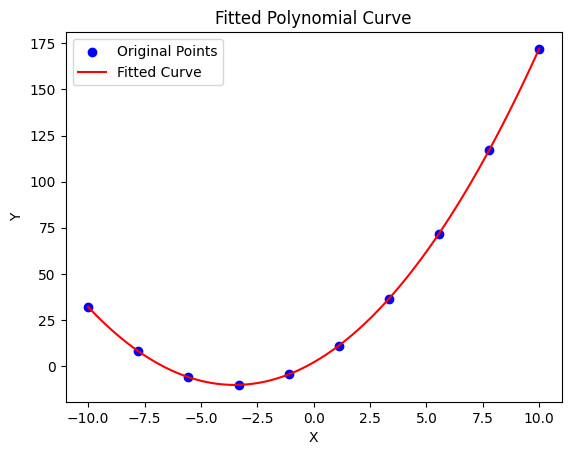

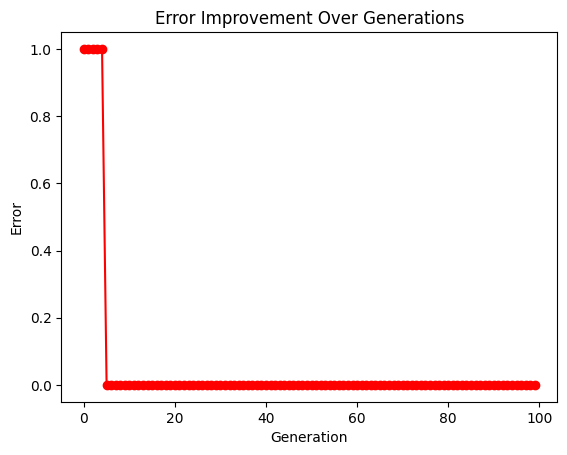

In [ ]:
#CODE VERSION 3
import numpy as np
import matplotlib.pyplot as plt

# Fitness function to evaluate the goodness of fit
def generate_polynomial_points(coefficients, num_points):
    x_values = np.linspace(-10, 10, num_points)
    y_values = np.polynomial.polynomial.polyval(x_values, coefficients)
    return np.column_stack((x_values, y_values))

def fitness_function(original, fitted):
    return int(np.mean(np.abs(original - fitted)))
# def fitness_value(original, fitted,fitness_over_generations):
#     error = np.sum((original - fitted) ** 2)
#     max_error = 100  # Maximum error corresponding to fitness value 0

#     if error == 0:
#         return 100.0
#     else:
#       if (100 - error / max_error * 100>=fitness_over_generations[-1]):
#           return 100 - error / max_error * 100
#       else :
#         return fitness_over_generations[-1]

# Crossover operation for the genetic algorithm
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Mutation operation for the genetic algorithm
def mutate(child, mutation_rate, coef_limits):
    for i in range(len(child)):
        if np.random.randint(0, 2):  # 50% chance for mutation
            child[i] = np.random.randint(coef_limits[i][0], coef_limits[i][1] + 1)  # Adding 1 to include the upper limit
    return child

# Genetic Algorithm
def genetic_algorithm(degree, coef_limits, original_points, population_size, mutation_rate, generations):
    population = []
    for _ in range(population_size):
        individual = []
        for limits in coef_limits:
            individual.append(np.random.randint(limits[0], limits[1]))
        population.append(np.array(individual))

    errors_over_generations = []  # List to store errors for each generation
    fitness_over_generations=[]

    for gen in range(generations):
        fitness_scores = []
        for individual in population:
            fitted_points = np.polynomial.polynomial.polyval(original_points[:, 0], individual)
            fitness = fitness_function(original_points[:, 1], fitted_points)
            # value_of_fitness=fitness_value(original_points[:, 1], fitted_points,fitness_over_generations)
            fitness_scores.append((individual, fitness))

        fitness_scores = sorted(fitness_scores, key=lambda x: x[1])
        fittest_individual = fitness_scores[0][0]

        # Calculate and store the error for the current generation
        error = fitness_scores[0][1]
        errors_over_generations.append(error)
        # fitness_over_generations.append(value_of_fitness)


        print(f"Generation {gen},Error: {error}, Best Coefficients: {fittest_individual}")

        # Visualizing the best fitted curve
        if gen == generations - 1:
            plt.scatter(original_points[:, 0], original_points[:, 1], color='blue', label='Original Points')
            x_values = np.linspace(np.min(original_points[:, 0]), np.max(original_points[:, 0]), 100)
            y_values = np.polynomial.polynomial.polyval(x_values, fittest_individual)
            plt.plot(x_values, y_values, color='red', label='Fitted Curve')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('Fitted Polynomial Curve')
            plt.legend()
            plt.show()

        new_population = [] ;
        Top10Percent= [x[0] for x in fitness_scores[:int(population_size * Survivors_rate)]] ;
        new_population.extend(Top10Percent)
        while len(new_population) < population_size:
            if len(population) < 2:
                new_population.append(population[0])  # Handle small populations
            else:
                indices = np.random.choice(range(len(population)), size=2, replace=False)
                parent1, parent2 = population[indices[0]], population[indices[1]]
                child1, child2 = crossover(parent1, parent2)
                #test for only mutation
                # child1 = mutate(parent1, mutation_rate, coef_limits)
                # child2 = mutate(parent2, mutation_rate, coef_limits)

                child1 = mutate(child1, mutation_rate, coef_limits)
                child2 = mutate(child2, mutation_rate, coef_limits)
                new_population.extend([child1, child2])

        population = new_population

    # Plot the errors over generations
    plt.plot(range(generations), errors_over_generations, marker='o', color='red')
    plt.xlabel('Generation')
    plt.ylabel('Error')
    plt.title('Error Improvement Over Generations')
    plt.show()


# Example usage
degree = int(input("Enter the degree of the polynomial: "))
coef_limits = []
for i in range(degree + 1):
    limit_input = input(f"Enter the coefficient limits for coefficient {i} in the format 'lower_limit,upper_limit': ")
    limit_values = tuple(map(int, limit_input.split(',')))
    coef_limits.append(limit_values)


# Set the number of sample points
num_points = 10

# Generate random sample points
coefficients = [np.random.randint(limit[0], limit[1]) for limit in coef_limits]
original_points = generate_polynomial_points(coefficients, num_points)


population_size = 100
mutation_rate = 0.2
generations = 100
Survivors_rate=0.1
print("Original Polynomial:")
print(f"y = {' + '.join(f'{coefficients[i]}x^{i}' for i in range(len(coefficients)))}")

genetic_algorithm(degree, coef_limits, original_points,population_size,mutation_rate, generations)


If we knew our coefficients are integer the finding process would be the same but the amount of possible guesses would be much much less therefore we may find the original polynomial with a very very high percentage

after all of my experiments were done I finnaly implemented the version CA1 wanted from us in version 4:

In [ ]:
#CODE VERSION 4
import numpy as np
import matplotlib.pyplot as plt

# Fitness function to evaluate the goodness of fit
# def fitness_function(original, fitted):
#     return int(np.mean(np.abs(original - fitted)))
# def fitness_function(original, fitted):
#     return int(np.sum((original - fitted) ** 2))
def fitness_function(original, fitted):
    error = np.sum((original - fitted) ** 2)
    if error == 0:
        return 1.0
    else:
        return 1 / (1 + error)
# Crossover operation for the genetic algorithm
def crossover(parent1, parent2):
    crossover_point = np.random.randint(1, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Mutation operation for the genetic algorithm
def mutate(child, mutation_rate, coef_limits):
    for i in range(len(child)):
        if np.random.randint(0, 100) > mutation_rate * 100:
            child[i] = np.random.randint(coef_limits[i][0], coef_limits[i][1] + 1)
    return child

# Genetic Algorithm
def genetic_algorithm(degree, coef_limits, original_points, population_size, mutation_rate, max_generations):
    population = []
    for _ in range(population_size):
        individual = []
        for limits in coef_limits:
            individual.append(np.random.randint(limits[0], limits[1] + 1))
        population.append(np.array(individual))

    errors_over_generations = []  # List to store errors for each generation

    for gen in range(max_generations):
        fitness_scores = []
        for individual in population:
            fitted_points = np.polynomial.polynomial.polyval(original_points[:, 0], individual)
            fitness = fitness_function(original_points[:, 1], fitted_points)
            fitness_scores.append((individual, fitness))

        fitness_scores = sorted(fitness_scores, key=lambda x: x[1])
        fittest_individual = fitness_scores[0][0]

        # Calculate and store the error for the current generation
        error = fitness_scores[0][1]
        errors_over_generations.append(error)

        print(f"Generation {gen}, Best Fitness: {error}, Best Coefficients: {fittest_individual}")

        # Visualizing the best fitted curve
        if gen == max_generations - 1:
            plt.scatter(original_points[:, 0], original_points[:, 1], color='blue', label='Original Points')
            x_values = np.linspace(np.min(original_points[:, 0]), np.max(original_points[:, 0]), 100)
            y_values = np.polynomial.polynomial.polyval(x_values, fittest_individual)
            plt.plot(x_values, y_values, color='red', label='Fitted Curve')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('Fitted Polynomial Curve')
            plt.legend()
            plt.show()

        # new_population = [fittest_individual]  # Keep the best individual
        new_population = [] ;
        Top10Percent= [x[0] for x in fitness_scores[:int(population_size * Survivors_rate)]] ;
        new_population.extend(Top10Percent)
        while len(new_population) < population_size:
            if len(population) < 2:
                new_population.append(population[0])  # Handle small populations
            else:
                indices = np.random.choice(range(len(population)), size=2, replace=False)
                parent1, parent2 = population[indices[0]], population[indices[1]]
                child1, child2 = crossover(parent1, parent2)
                #

                new_population.extend([child1, child2])

        population = new_population

    # Plot the errors over generations
    plt.plot(range(max_generations), errors_over_generations, marker='o')
    plt.xlabel('Generation')
    plt.ylabel('Error')
    plt.title('Error Improvement Over Generations')
    plt.show()

degree = int(input("Enter the degree of the polynomial: "))
coef_limits = []
for i in range(degree + 1):
    limit_input = input(f"Enter the coefficient limits for coefficient {i} in the format 'lower_limit,upper_limit': ")
    limit_values = tuple(map(int, limit_input.split(',')))
    coef_limits.append(limit_values)

num_points = int(input("Enter the number of sample points: "))
original_points = np.zeros((num_points, 2), dtype=int)
for i in range(num_points):
    # x = int(input(f"Enter x coordinate for point {i + 1}: "))
    # y = int(input(f"Enter y coordinate for point {i + 1}: "))
    coordinates = input(f"Enter x, y coordinates for point {i + 1} (in the format x,y): ")
    x, y = map(int, coordinates.split(","))
    original_points[i] = (x, y)

population_size = 100
mutation_rate = 0.2
Survivors_rate=0.1
generations = 50

genetic_algorithm(degree, coef_limits, original_points, population_size, mutation_rate, generations)


Enter the degree of the polynomial: 3
Enter the coefficient limits for coefficient 0 in the format 'lower_limit,upper_limit': -5,5
Enter the coefficient limits for coefficient 1 in the format 'lower_limit,upper_limit': -5,5
Enter the coefficient limits for coefficient 2 in the format 'lower_limit,upper_limit': -5,5
Enter the coefficient limits for coefficient 3 in the format 'lower_limit,upper_limit': -5,5
Enter the number of sample points: 6
Enter x, y coordinates for point 1 (in the format x,y): 1,1
Enter x, y coordinates for point 2 (in the format x,y): -1,-1
Enter x, y coordinates for point 3 (in the format x,y): 3.27


ValueError: ignored

1)There is a threshold on both large populations and small populations if the population number is too large for example a number around 5000 each iteration of generation creation will take so much time to procces also if the population is so small for example a number around 10 or less we may never find the optimal solution because of the lack of diversity

2)The optimal way to increment the population size is to only increment it on iterarions which the if statement of mutation is positive because if we do it every time the proccess time will take so much time and may harm the convergence of the data causing the optimal solution not being found

3)Using only one of the methods of crossover and mutation may be able to optimize our answer in some generations but it wont usually lead to the optimal solution
If I had to compare using only one of the methods I would say crossover may lead to better answers but on some situations even this comparison fall aparts

4)with the right mutation rate (a number between 0.5-0.2) and a population size of 100 that is pretty fast to iterate the optimal answer will not take than 20-30 generations to be found
If we use numpy built in fucntions as much as possible we can enhance the performance

5)If the proposed problem occurs we probably have a too low rate of a mutation because the job of mutation function is to create diversity and stop the convergence of the data to the wrong ways

6)I have implemented a genetic algorithm based on generation number we want in #CODE VERSION 4 and also one with a while to find the error=0 in #CODE VERSION 2

7)less than linear
 not very sufficient

8)adding enough points is the best way to gurantee finding the optimal solution I have implemented a version of code based on number of points in #CODE VERSION 3